In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.9 MB/s et

In [ ]:
!pip install keras-ocr

In [ ]:
!pip install tensorflow==2.9.0

In [ ]:
X="/content/h1.jpeg"
Y="/content/i1.jpeg"

In [ ]:
import gradio as gr
inputs = [
    gr.Image(label="Image 1"),
    gr.Image(label="Image 2")
]

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 37s 8s/step


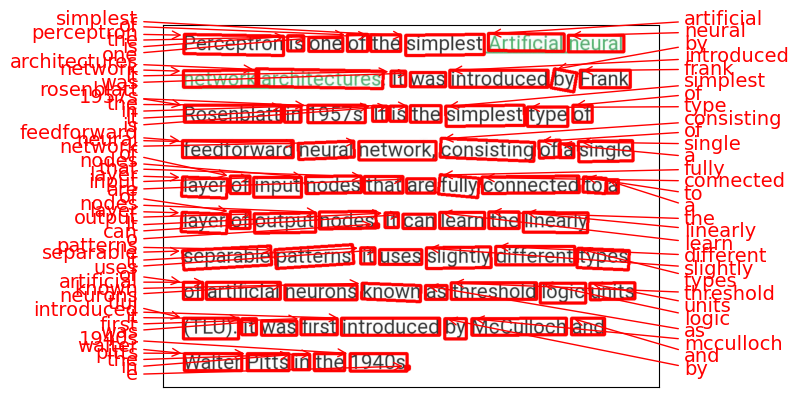

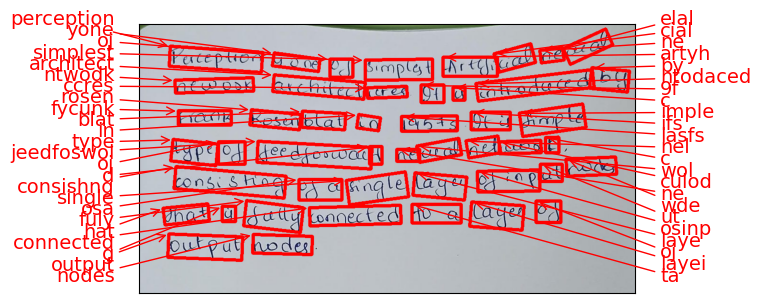

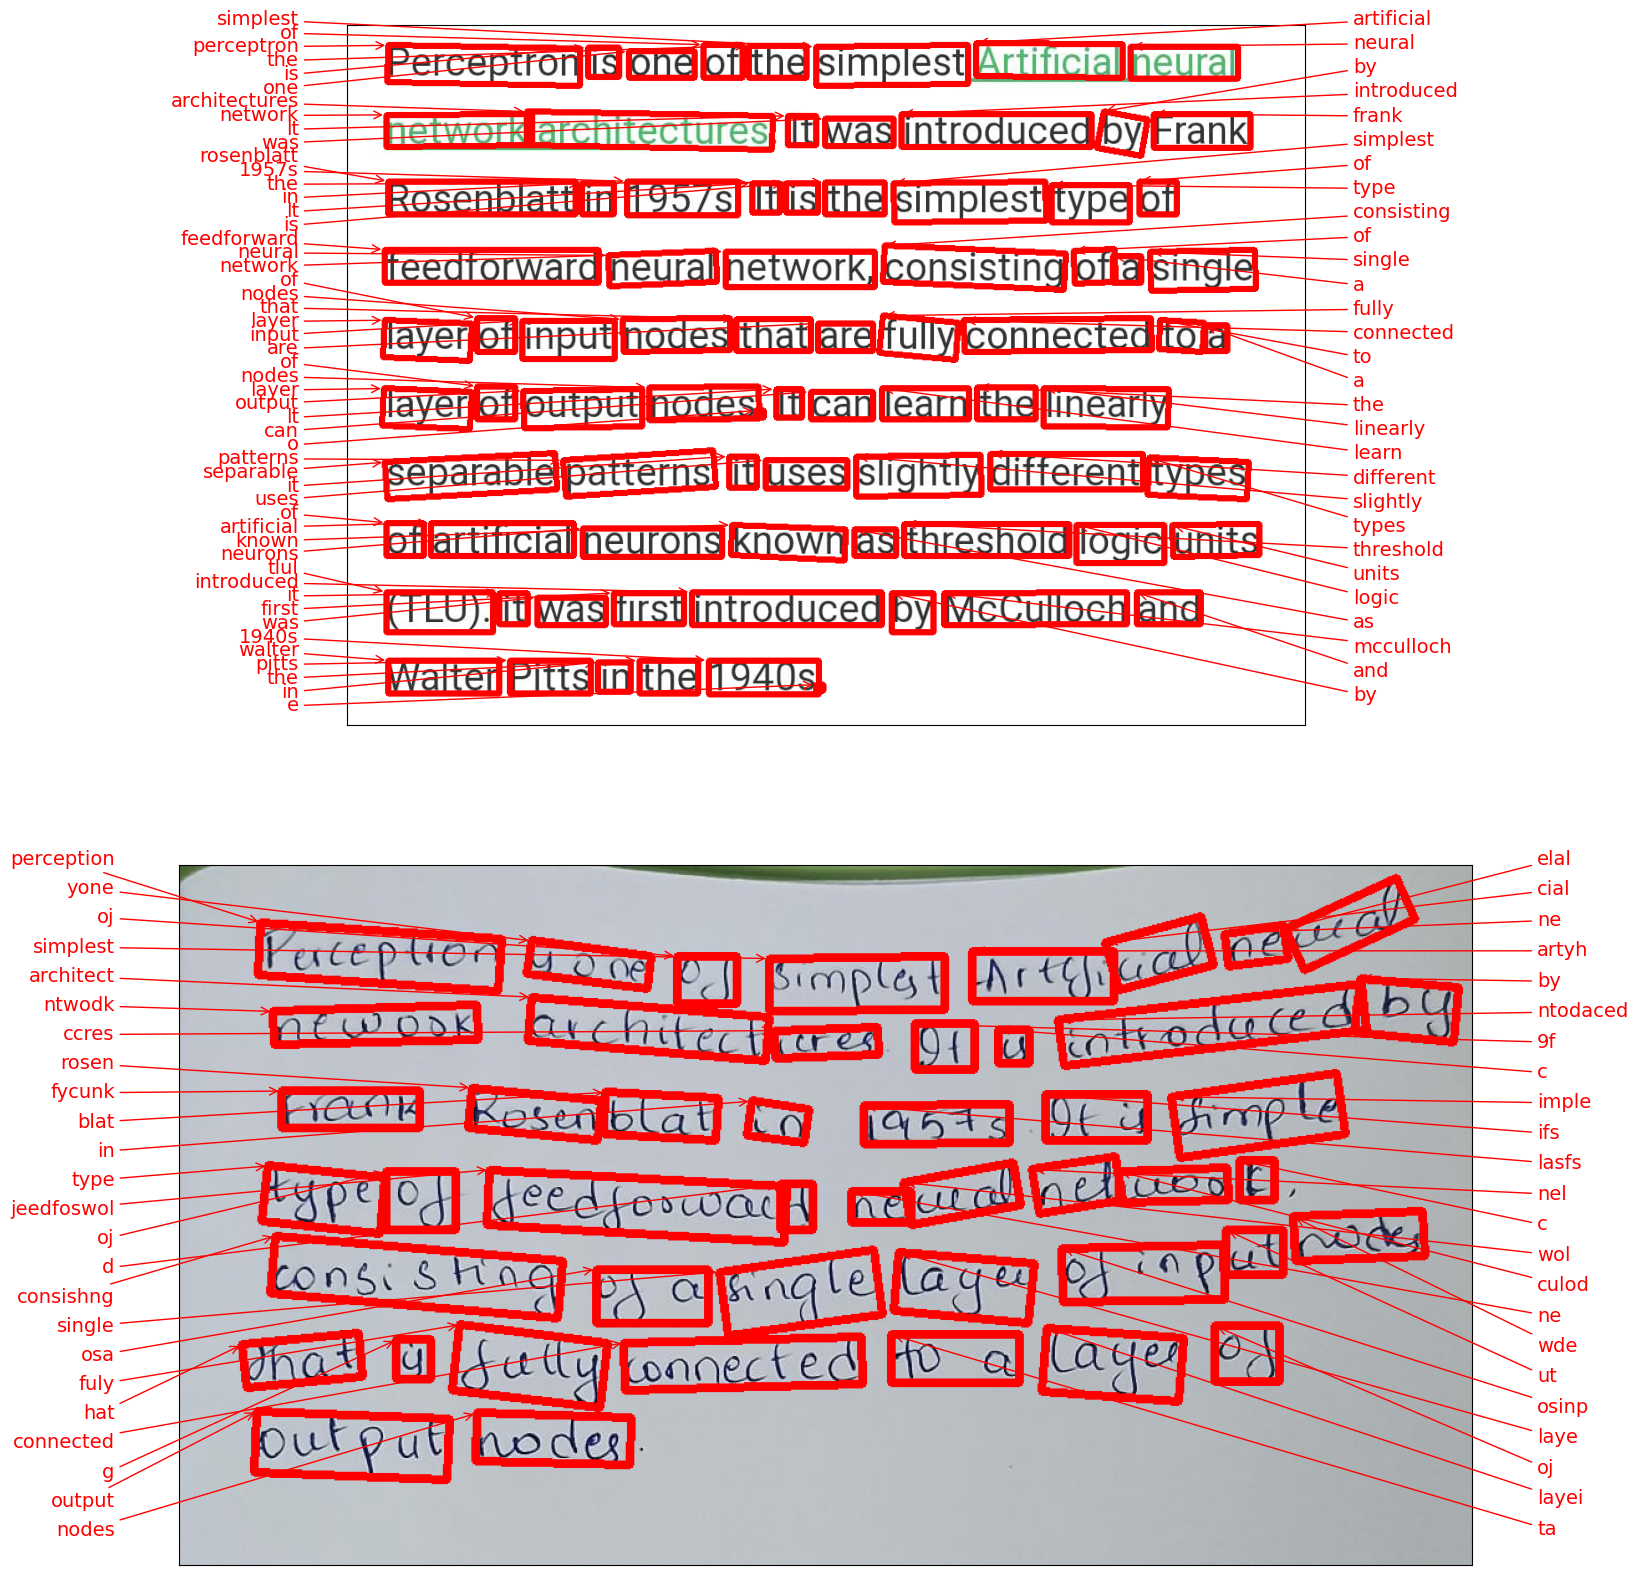

In [ ]:
from keras_ocr import pipeline
import keras_ocr
from matplotlib import pyplot as plt
import numpy as np
import sys

# Initialize the pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Read images
images = [keras_ocr.tools.read(image) for image in ['/content/h1.jpeg', '/content/i1.jpeg']]

# Recognize text in images
prediction_groups = pipeline.recognize(images)

# Open a text file for writing
with open('a1..txt', 'w') as file:
    # Redirect stdout to the text file
    sys.stdout = file

    # Loop through images and their predictions, drawing annotations
    for image, predictions in zip(images, prediction_groups):
        keras_ocr.tools.drawAnnotations(image=image, predictions=predictions)
        print('\n\n\n')  # Add some space between images

    # Reset stdout to its default value (console)
    sys.stdout = sys.__stdout__

# Plot images with annotations (optional)
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
plt.show()


In [ ]:
!pip install language_tool_python

In [ ]:
from language_tool_python import LanguageTool

def check_grammar_from_file(file_path):
    # Read text from file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Initialize LanguageTool with English language
    tool = LanguageTool('en-US')

    # Check the text for grammar errors
    matches = tool.check(text)

    # Return the matches found
    return matches

def calculate_correct_percentage(paragraph, matches):
    # Calculate the percentage of correct grammar
    total_words = len(paragraph.split())
    total_errors = len(matches)
    correct_words = total_words - total_errors
    correct_percentage = (correct_words / total_words) * 100
    return correct_percentage

# Example file path
file_path = "/content/a1.txt"

# Check grammar from file
grammar_errors = check_grammar_from_file(file_path)

# Read text from file
with open(file_path, 'r', encoding='utf-8') as file:
    paragraph = file.read()

# Calculate correct percentage
correct_percentage = calculate_correct_percentage(paragraph, grammar_errors)

# Display correct percentage
print("Correct grammar percentage: {:.2f}%".format(correct_percentage))


Correct grammar percentage: 93.59%


In [ ]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

def calculate_word_count(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Count the number of words in the text
    word_count = len(doc)
    return word_count

def calculate_percentage(text1, text2):
    # Calculate word count for both texts
    word_count_text1 = calculate_word_count(text1)
    word_count_text2 = calculate_word_count(text2)

    # Calculate percentage
    if word_count_text2 != 0:
        percentage = (word_count_text1 / word_count_text2) * 100
    else:
        percentage = 0

    return percentage

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text

# Example usage
file_path1 = "/content/a2.txt"  # Update with path to the first text file
file_path2 = "/content/a1.txt"  # Update with path to the second text file

text1 = read_text_from_file(file_path1)
text2 = read_text_from_file(file_path2)

percentage = calculate_percentage(text1, text2)
print("Percentage of word count of text1 compared to text2:", percentage, "%")


Percentage of word count of text1 compared to text2: 51.724137931034484 %


In [ ]:
import spacy
from difflib import SequenceMatcher

# Load English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")

# Function to read text from files
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to compute syntactic similarity between two sentences
def syntactic_similarity(sentence1, sentence2):
    # Parse sentences using spaCy
    doc1 = nlp(sentence1)
    doc2 = nlp(sentence2)

    # Extract dependency parse trees
    tree1 = [(token.text, token.dep_) for token in doc1]
    tree2 = [(token.text, token.dep_) for token in doc2]

    # Compute similarity using SequenceMatcher
    matcher = SequenceMatcher(None, tree1, tree2)
    similarity_ratio = matcher.ratio()

    return similarity_ratio

# Function to compute syntactic similarity between two text files
def syntactic_similarity_files(file1_path, file2_path):
    # Read text from files
    text1 = read_text_file(file1_path)
    text2 = read_text_file(file2_path)

    # Tokenize text into sentences
    sentences1 = [sent.text.strip() for sent in nlp(text1).sents]
    sentences2 = [sent.text.strip() for sent in nlp(text2).sents]

    # Compute syntactic similarity for each pair of sentences
    similarity_scores = []
    for sent1 in sentences1:
        for sent2 in sentences2:
            similarity_score = syntactic_similarity(sent1, sent2)
            similarity_scores.append(similarity_score)

    # Overall similarity score is the average of all sentence pairs' scores
    overall_similarity_score = sum(similarity_scores) / len(similarity_scores)

    return overall_similarity_score

# Paths to the two text files
file1_path = '/content/a1.txt'
file2_path = '/content/a2.txt'

# Compute syntactic similarity between the two files
syn = syntactic_similarity_files(file1_path, file2_path)
print("Syntactic similarity score:", syn)


Syntactic similarity score: 0.22896813490647


In [ ]:
!pip install transformers

In [ ]:
!pip install scikit-learn

In [ ]:
import os
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Function to extract BERT embeddings from text
def get_bert_embeddings(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    return last_hidden_states.mean(dim=1).squeeze().numpy()  # Mean pooling over the token embeddings

# Function to calculate cosine similarity between two vectors
def cosine_similarity_vectors(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

# Function to read text from files
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the two text files
file1_path = '/content/a1.txt'
file2_path = '/content/a2.txt'

# Read text from files
text1 = read_text_file(file1_path)
text2 = read_text_file(file2_path)

# Get BERT embeddings for both texts
embedding1 = get_bert_embeddings(text1)
embedding2 = get_bert_embeddings(text2)

# Calculate cosine similarity between embeddings
con = cosine_similarity_vectors(embedding1, embedding2)

print("Contextual Similarity:",con)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Contextual Similarity: 0.9451954


In [ ]:
!pip install tensorflow_text

In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to read text from files
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the two text files
file1_path = '/content/a1.txt'
file2_path = '/content/a2.txt'

# Read text from files
text1 = read_text_file(file1_path)
text2 = read_text_file(file2_path)

# Compute embeddings for both texts
embedding1 = model.encode(text1, convert_to_tensor=True)
embedding2 = model.encode(text2, convert_to_tensor=True)

# Calculate cosine similarity between embeddings
sem= util.pytorch_cos_sim(embedding1, embedding2).item()

print("semantic similarity:", sem)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

semantic similarity: 0.895166277885437


In [ ]:
similarity_percent=(sem*33.3+con*33.3+syn*33.3)
sf1=similarity_percent
print(sf1)

68.90868199584195


In [ ]:
!pip install rake_nltk
!pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import re
from rake_nltk import Rake
from yake import KeywordExtractor
from string import punctuation

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def find_numeric_parts(paragraph):
    # Tokenize the paragraph into words
    words = word_tokenize(paragraph)

    # Initialize a list to store numeric parts
    numeric_parts = []

    # Define regular expression pattern to match numeric parts
    pattern = re.compile(r'\d+')

    # Iterate through each word and check for numeric parts
    for word in words:
        # Find all numeric parts in the word
        parts = pattern.findall(word)
        # Add the numeric parts to the list
        numeric_parts.extend(parts)

    return numeric_parts

def extract_keywords_tfidf(paragraph):
    # Tokenize the paragraph
    tokens = word_tokenize(paragraph)

    # Remove stopwords and punctuation marks, and convert words to lowercase
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if (word.lower() not in stop_words and word not in punctuation)]

    # Join the tokens back into a string
    processed_text = ' '.join(filtered_tokens)

    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the processed text
    tfidf_matrix = vectorizer.fit_transform([processed_text])

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Get TF-IDF scores for each word
    tfidf_scores = tfidf_matrix.toarray()[0]

    # Combine words with their TF-IDF scores into a dictionary
    word_tfidf = dict(zip(feature_names, tfidf_scores))

    # Sort words by TF-IDF score in descending order
    sorted_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)

    # Extract top keywords (you can adjust the number as per your requirement)
    top_keywords = [word[0] for word in sorted_words[:5]]  # Change 5 to the desired number of keywords

    return top_keywords

def extract_keywords_textrank(paragraph):
    # Tokenize the paragraph into sentences
    sentences = sent_tokenize(paragraph)

    # Tokenize each sentence into words, remove stopwords and punctuation marks, and convert words to lowercase
    stop_words = set(stopwords.words('english'))
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    word_tokens = [[word.lower() for word in words if word.lower() not in stop_words and word not in punctuation] for words in word_tokens]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    word_tokens = [[lemmatizer.lemmatize(word) for word in words] for words in word_tokens]

    # Build co-occurrence matrix
    co_occurrence = defaultdict(lambda: defaultdict(int))
    for words in word_tokens:
        for i, word1 in enumerate(words):
            for j, word2 in enumerate(words):
                if i != j:
                    co_occurrence[word1][word2] += 1

    # Calculate TextRank scores
    scores = defaultdict(float)
    damping_factor = 0.85
    epsilon = 1e-5
    for word, co_words in co_occurrence.items():
        scores[word] = 1.0
        for co_word in co_words:
            scores[word] += damping_factor * scores[co_word] / (len(co_words) or 1)

    # Sort words by TextRank scores
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Extract top keywords (you can adjust the number as per your requirement)
    top_keywords = [word[0] for word in sorted_words[:5]]  # Change 5 to the desired number of keywords

    return top_keywords

def extract_keywords_rake(paragraph):
    # Initialize RAKE
    rake = Rake()

    # Extract keywords using RAKE
    rake.extract_keywords_from_text(paragraph)

    # Get top keywords
    top_keywords = rake.get_ranked_phrases()[:5]  # Change 5 to the desired number of keywords

    return top_keywords

def extract_keywords_yake(paragraph):
    # Initialize YAKE
    keyword_extractor = KeywordExtractor()

    # Extract keywords using YAKE
    keywords = keyword_extractor.extract_keywords(paragraph)

    # Get top keywords
    top_keywords = [keyword for keyword, score in keywords][:5]  # Change 5 to the desired number of keywords

    return top_keywords

def extract_keywords_combined(paragraph):
    keywords_tfidf = extract_keywords_tfidf(paragraph)
    keywords_textrank = extract_keywords_textrank(paragraph)
    keywords_rake = extract_keywords_rake(paragraph)
    keywords_yake = extract_keywords_yake(paragraph)

    # Combine keywords from all methods
    combined_keywords = set(keywords_tfidf) | set(keywords_textrank) | set(keywords_rake) | set(keywords_yake)

    return list(combined_keywords)

def write_to_file(filename, keywords, numbers):
    with open(filename, 'a') as file:
        file.write("{}".format(", ".join(keywords)))
        file.write(",")
        file.write("{}\n".format(", ".join(numbers)))
        file.write("\n")

# Read paragraph from the text file
def read_paragraph_from_file(file_path):
    with open(file_path, 'r') as file:
        paragraph = file.read()
    return paragraph

# Example file path
file_path = "/content/a1.txt"

# Read paragraph from the file
paragraph = read_paragraph_from_file(file_path)

# Extract numbers from the paragraph
numbers = find_numeric_parts(paragraph)
print("Numbers:", numbers)

# Extract keywords using combined method
keywords_combined = extract_keywords_combined(paragraph)
print("Keywords (Combined):", keywords_combined)

# Write extracted keywords and numbers to a text file
write_to_file("outputfinal.txt", keywords_combined, numbers)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Numbers: ['1957', '1940']
Keywords (Combined): ['feedforward neural network', 'Artificial neural network', 'threshold logic units', 'connected', 'introduced', 'neural', 'Frank Rosenblatt', 'network architectures', 'layer', 'simplest artificial neural network architectures', 'output', 'neural network architectures', 'network', 'uses slightly different types', 'unit', 'simplest Artificial neural', 'tlu', 'artificial', 'artificial neurons known', '1940s']


In [ ]:
def remove_duplicates_from_file(file_path):
    # Read the contents of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Convert everything to lowercase and remove leading/trailing whitespaces
    lines = [line.lower().strip() for line in lines]

    # Remove duplicates
    unique_lines = list(set(lines))

    # Write unique lines back to the file
    with open(file_path, 'w') as file:
        for line in unique_lines:
            file.write(line + '\n')

# Example usage:
output_file_path = "/content/outputfinal.txt"
remove_duplicates_from_file(output_file_path)


In [ ]:
def remove_substrings(input_file, output_file, substrings):
    try:
        with open(input_file, 'r') as file:
            lines = file.readlines()

        modified_lines = []
        for line in lines:
            words = line.strip().split(',')
            modified_words = [word.replace(substring, '') for word in words for substring in substrings]
            modified_line = ','.join(modified_words)
            modified_lines.append(modified_line)

        with open(output_file, 'w') as file:
            file.writelines(modified_lines)

        print("Substrings removed successfully. Modified content saved to", output_file)
    except FileNotFoundError:
        print("File not found.")

# Example usage:
input_file = "/content/outputfinal.txt"  # Path to your input Notepad file
output_file = "modified_output.txt"  # Path to the output file
substrings_to_remove = ["substring1", "substring2"]  # Substrings you want to remove

remove_substrings(input_file, output_file, substrings_to_remove)


Substrings removed successfully. Modified content saved to modified_output.txt


In [ ]:
from collections import Counter

def compress_lines(input_file, output_file):
    try:
        with open(input_file, 'r') as file:
            lines = file.readlines()

        # Combine both lines to count occurrences
        combined_words = lines[0].strip().split(', ') + lines[1].strip().split(', ')

        # Count occurrences of words
        word_counts = Counter(combined_words)

        # Compress the first line
        compressed_first_line = [str(word_counts[word]) for word in lines[0].strip().split(', ')]

        # Write the compressed first line to the output file
        with open(output_file, 'w') as file:
            file.write(', '.join(compressed_first_line))

        print("Compression successful. Compressed content saved to", output_file)
    except FileNotFoundError:
        print("File not found.")

# Example usage:
input_file = "/content/outputfinal.txt"  # Path to your input file
output_file = "compressed_output.txt"  # Path to the output file

compress_lines(input_file, output_file)


Compression successful. Compressed content saved to compressed_output.txt


In [ ]:
def calculate_percentage_matched(answer, keywords):
    total_keywords = len(keywords)
    matched_keywords = sum(keyword in answer.lower() for keyword in keywords)
    percentage_matched = (matched_keywords / total_keywords) * 100
    return percentage_matched

def get_keywords_from_file(file_path):
    with open(file_path, 'r') as file:
        keywords_input = file.read()
    keywords = [keyword.strip() for keyword in keywords_input.split(',')]
    return keywords

def read_answer_from_file(file_path):
    with open(file_path, 'r') as file:
        answer = file.read()
    return answer

# Example usage:
answer_file_path = "/content/a2.txt"
keywords_file_path = "/content/modified_output.txt"

# Read answer from file
answer = read_answer_from_file(answer_file_path)

# Get keywords from file
keywords = get_keywords_from_file(keywords_file_path)

percentage_matched = calculate_percentage_matched(answer, keywords)
print(f"Percentage of correct words: {percentage_matched}%")


Percentage of correct words: 46.666666666666664%


In [ ]:
def calculate_weighted_score(size, language_score, keywords_score, similarity_score, total_score):
    # Define weights for each aspect
    size_weight = 0.05
    language_weight = 0.05
    keywords_weight = 0.1
    similarity_weight = 0.8

    # Calculate weighted scores
    weighted_size = size * size_weight
    weighted_language = language_score * language_weight
    weighted_keywords = keywords_score * keywords_weight
    weighted_similarity = similarity_score * similarity_weight

    # Calculate total weighted score
    total_weighted_score = (weighted_size + weighted_language + weighted_keywords + weighted_similarity) * total_score

    # Round the weighted score to the nearest whole number
    rounded_weighted_score = round(total_weighted_score)

    return rounded_weighted_score

# Example usage:
def get_user_input():
    size = float(percentage)
    language_score = float(correct_percentage)
    keywords_score = float(percentage_matched)
    similarity_score = float(sf1)
    total_score = float(input("Enter the total score: "))

    return size, language_score, keywords_score, similarity_score, total_score

size, language_score, keywords_score, similarity_score, total_score = get_user_input()
weighted_score = calculate_weighted_score(size, language_score, keywords_score, similarity_score, total_score)
print("Weighted score:", weighted_score/100)

Enter the total score: 5
Weighted score: 3.35


In [ ]:
import math
percent1=weighted_score/100
k=math.ceil(percent1)
print(k)

4


In [ ]:
i=int(input())
if(i==0):
  if(k<50.0):
    m="Keep trying you are just one more practice away"
  elif(k>=50.0 and k<60.0):
    m="That's Definitely a good start"
  elif(k>=60.0 and k<70.0):
    m="You are just few steps away from perfection"
  elif(k>=70.0 and k<80.0):
    m="Great! You will be known for perfection"
  elif(k>=80.0 and k<90.0):
    m="Congrats!! You are doing amazing"
  else:
    m="Congrats!!! You can beat yourself now"
else:
  m=input()

0


In [ ]:
import gradio as gr

# Define your function
def my_function(image1, image2):
    # Your code here

    output = f"Grammar: {percentage}\n" \
             f"Length Percentage: {correct_percentage}\n" \
             f"Similarity: {sf1}\n" \
             f"Keywords: {percentage_matched}\n" \
             f"Final Score: {k}\n" \
             f"Comments: {m}"

    return output

# Create Gradio interface with input images
iface = gr.Interface(fn=my_function,
                      inputs=[gr.Image(label="Image 1"), gr.Image(label="Image 2")],
                      outputs="text",
                      title="Output Display")

# Launch the interface
url=iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://be2211675130c51a1f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
